In [1]:
import json
import folium
import requests
from data_keys import ScoringKeys as SK, LocationKeys as LK, CoordinateKeys as CK
from api import getGeneralData, getMapData, getGame
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()
apiKey = os.environ["apiKey"]
mapNames = ['goteborg','uppsala','linkoping','vasteras']

# Load Map and General data

In [3]:
##Get map data from Considition endpoint
mapEntities = {}
for mapName in mapNames:
    mapEntities[mapName] = getMapData(mapName, apiKey)

https://api.considition.com
https://api.considition.com
https://api.considition.com
https://api.considition.com


In [4]:
##Get non map specific data from Considition endpoint
generalData = getGeneralData()

## Analysis

In [5]:
import pandas as pd

In [6]:
generalData

{'classicUnitData': {'type': 'classic',
  'co2PerUnitInGrams': 570.0,
  'profitPerUnit': 0.0},
 'refillUnitData': {'type': 'refill',
  'co2PerUnitInGrams': 0.0,
  'profitPerUnit': 130.0},
 'freestyle9100Data': {'type': 'freestyle9100',
  'leasingCostPerWeek': 1038.0,
  'refillCapacityPerWeek': 438.0,
  'staticCo2': 6330.0},
 'freestyle3100Data': {'type': 'freestyle3100',
  'leasingCostPerWeek': 598.0,
  'refillCapacityPerWeek': 70.0,
  'staticCo2': 2110.0},
 'locationTypes': {'groceryStoreLarge': {'type': 'Grocery-store-large',
   'salesVolume': 373.0},
  'groceryStore': {'type': 'Grocery-store', 'salesVolume': 121.0},
  'convenience': {'type': 'Convenience', 'salesVolume': 15.0},
  'gasStation': {'type': 'Gas-station', 'salesVolume': 24.0},
  'kiosk': {'type': 'Kiosk', 'salesVolume': 3.0}},
 'competitionMapNames': ['stockholm',
  'orebro',
  'malmo',
  'london',
  'berlin',
  's-sandbox'],
 'trainingMapNames': ['goteborg',
  'uppsala',
  'linkoping',
  'vasteras',
  'g-sandbox'],
 'co

In [7]:
mapEntities['goteborg'].keys()

dict_keys(['mapName', 'border', 'locations', 'hotspots', 'locationTypeCount', 'availableFrom', 'availableTo'])

In [8]:
dfs = {}
for mapName, mapEntity in mapEntities.items():
    dfs[mapName] = pd.DataFrame.from_dict(mapEntity['locations'],orient='index')

In [9]:
for mapName, df in dfs.items():
    dfs[mapName]['mapName']=mapName
    dfs[mapName] = dfs[mapName].reset_index()
    print(len(dfs[mapName]))

244
56
39
46


In [10]:
dfs['goteborg']

,index,locationName,locationType,latitude,longitude,footfall,footfallScale,salesVolume,mapName
0,location1,location1,Gas-station,57.694331,11.935614,0.286085,1,24.0,goteborg
1,location2,location2,Gas-station,57.651156,11.903150,0.018983,1,24.0,goteborg
2,location3,location3,Gas-station,57.680577,11.944225,0.228024,1,24.0,goteborg
3,location4,location4,Gas-station,57.647797,11.891450,0.091048,1,24.0,goteborg
4,location5,location5,Gas-station,57.634619,11.930924,0.075483,1,24.0,goteborg
...,...,...,...,...,...,...,...,...,...
239,location240,location240,Gas-station,57.645950,11.984690,0.069380,1,24.0,goteborg
240,location241,location241,Gas-station,57.645940,11.985340,0.042797,1,24.0,goteborg
241,location242,location242,Grocery-store,57.639490,11.951740,0.077925,1,121.0,goteborg
242,location243,location243,Convenience,57.696660,11.951539,0.374589,1,15.0,goteborg


## Footfall distribution

In [11]:
total_footfall = pd.concat([df[['footfallScale','footfall','mapName']] for df in dfs.values()])
total_footfall

,footfallScale,footfall,mapName
0,1,0.286085,goteborg
1,1,0.018983,goteborg
2,1,0.228024,goteborg
3,1,0.091048,goteborg
4,1,0.075483,goteborg
...,...,...,...
41,1,0.090282,vasteras
42,1,0.107551,vasteras
43,3,0.306709,vasteras
44,1,0.051919,vasteras


### footfall on footfall scale

In [12]:
total_footfall.groupby(['footfallScale'])[['footfall']].describe()

footfall                                                    \
                 count      mean       std       min       25%       50%   
footfallScale                                                              
0                 33.0  0.000000  0.000000  0.000000  0.000000  0.000000   
1                282.0  0.140786  0.111245  0.001734  0.055459  0.095563   
2                 24.0  0.500097  0.148374  0.132653  0.493469  0.525063   
3                 22.0  0.614454  0.198310  0.200745  0.459937  0.678794   
4                  4.0  0.782138  0.331341  0.287148  0.753155  0.930109   
5                  5.0  1.138619  0.239640  0.720064  1.162338  1.241300   
6                  3.0  1.210774  0.318390  0.848387  1.093351  1.338315   
8                  3.0  1.940347  0.015876  1.923772  1.932813  1.941854   
9                  5.0  1.951336  0.332585  1.370072  2.029709  2.036801   
10                 4.0  1.288295  0.694062  0.632581  0.850541  1.148558   

                                   
                    75%       max  
footfallScale                      
0              0.000000  0.000000  
1              0.227234  0.431833  
2              0.609942  0.659649  
3              0.757375  0.849446  
4              0.959093  0.981187  
5              1.265473  1.303920  
6              1.391968  1.445621  
8              1.948635  1.955416  
9              2.115234  2.204862  
10             1.586311  2.223482

### type on footfall scale

In [13]:
# locationTypes = generalData['locationTypes'].keys()
locationTypes = ['Grocery-store-large','Grocery-store','Gas-station','Convenience','Kiosk']

In [14]:
for mapName, df in dfs.items():
    footfall_distribution_list = {}
    for locationType in locationTypes:
        # total_count = df[(df['locationType']==locationType) & (df['mapName']==mapName)]['salesVolume'].count()
        total_dist = df[(df['locationType']==locationType) & (df['mapName']==mapName)].groupby(['footfallScale'])['salesVolume'].count()
        footfall_distribution_list[locationType] = total_dist # / total_count
    display(pd.DataFrame(footfall_distribution_list))      

,Grocery-store-large,Grocery-store,Gas-station,Convenience,Kiosk
footfallScale,,,,,
0,2.0,4.0,8.0,NaN,3.0
1,9.0,60.0,49.0,24.0,34.0
2,1.0,4.0,1.0,6.0,7.0
3,NaN,1.0,NaN,9.0,5.0
4,NaN,1.0,NaN,2.0,NaN
5,NaN,NaN,NaN,3.0,1.0
6,NaN,NaN,NaN,1.0,1.0
8,NaN,NaN,NaN,2.0,1.0
9,NaN,NaN,NaN,4.0,NaN


,Grocery-store-large,Grocery-store,Gas-station,Convenience,Kiosk
footfallScale,,,,,
0,NaN,1.0,3.0,NaN,NaN
1,7.0,21.0,8.0,3.0,4.0
2,NaN,1.0,NaN,1.0,NaN
3,NaN,1.0,NaN,2.0,NaN
5,NaN,NaN,NaN,1.0,NaN
6,NaN,1.0,NaN,NaN,NaN
9,NaN,NaN,NaN,1.0,NaN
10,NaN,NaN,NaN,NaN,1.0


,Grocery-store-large,Grocery-store,Gas-station,Convenience,Kiosk
footfallScale,,,,,
0,NaN,NaN,1.0,NaN,3
1,NaN,11.0,6.0,2.0,10
2,NaN,1.0,NaN,NaN,1
3,NaN,1.0,NaN,NaN,1
4,NaN,NaN,NaN,NaN,1
10,NaN,NaN,NaN,NaN,1


,Grocery-store-large,Grocery-store,Gas-station,Convenience,Kiosk
footfallScale,,,,,
0,NaN,1.0,4.0,NaN,3.0
1,4.0,12.0,15.0,NaN,3.0
2,NaN,1.0,NaN,NaN,NaN
3,NaN,1.0,NaN,1.0,NaN
10,NaN,NaN,NaN,1.0,NaN


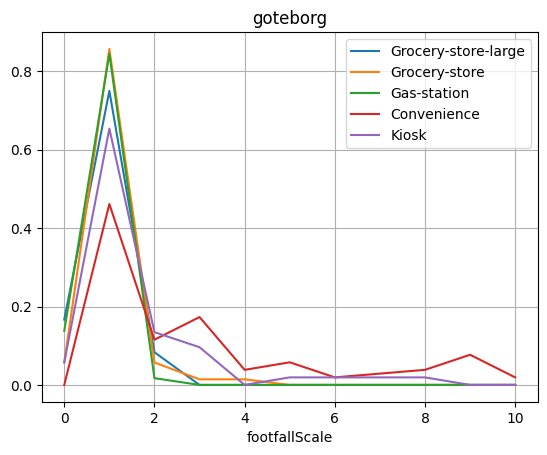

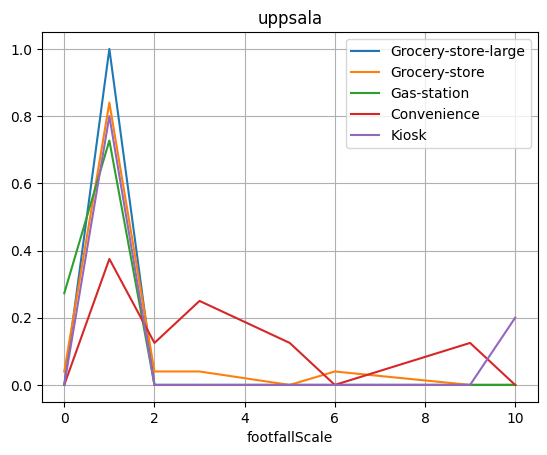

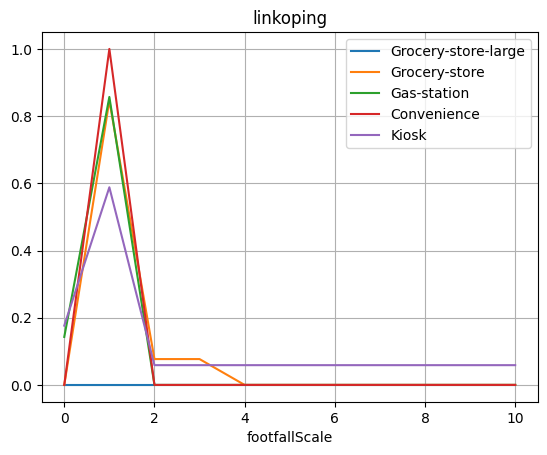

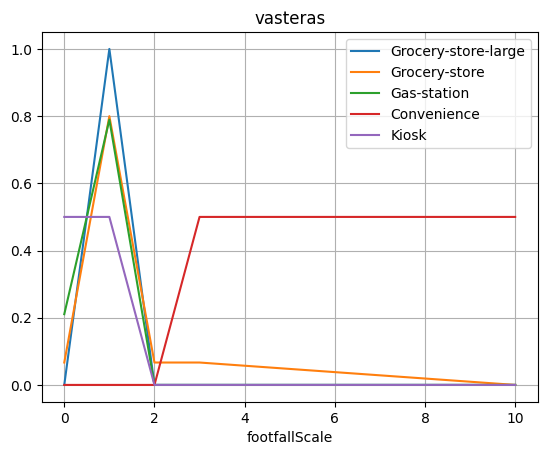

In [15]:
for mapName, df in dfs.items():
    footfall_distribution_list = {}
    for locationType in locationTypes:
        total_count = df[(df['locationType']==locationType) & (df['mapName']==mapName)]['salesVolume'].count()
        total_dist = df[(df['locationType']==locationType) & (df['mapName']==mapName)].groupby(['footfallScale'])['salesVolume'].count()
        footfall_distribution_list[locationType] = total_dist / total_count
    pd.DataFrame(footfall_distribution_list).fillna(0).plot.line(rot=0,grid=True,title=mapName)        

## Store Distribution

In [16]:
for mapName, df in dfs.items():
    store_distribution_list = {}
    for locationType in locationTypes:
        total_dist = df[(df['locationType']==locationType) & (df['mapName']==mapName)].groupby(['footfallScale'])['salesVolume'].count()
        store_distribution_list[locationType] = total_dist # / total_count
    display(pd.DataFrame(footfall_distribution_list)) 

,Grocery-store-large,Grocery-store,Gas-station,Convenience,Kiosk
footfallScale,,,,,
0,NaN,0.066667,0.210526,NaN,0.5
1,1.0,0.800000,0.789474,NaN,0.5
2,NaN,0.066667,NaN,NaN,NaN
3,NaN,0.066667,NaN,0.5,NaN
10,NaN,NaN,NaN,0.5,NaN


,Grocery-store-large,Grocery-store,Gas-station,Convenience,Kiosk
footfallScale,,,,,
0,NaN,0.066667,0.210526,NaN,0.5
1,1.0,0.800000,0.789474,NaN,0.5
2,NaN,0.066667,NaN,NaN,NaN
3,NaN,0.066667,NaN,0.5,NaN
10,NaN,NaN,NaN,0.5,NaN


,Grocery-store-large,Grocery-store,Gas-station,Convenience,Kiosk
footfallScale,,,,,
0,NaN,0.066667,0.210526,NaN,0.5
1,1.0,0.800000,0.789474,NaN,0.5
2,NaN,0.066667,NaN,NaN,NaN
3,NaN,0.066667,NaN,0.5,NaN
10,NaN,NaN,NaN,0.5,NaN


,Grocery-store-large,Grocery-store,Gas-station,Convenience,Kiosk
footfallScale,,,,,
0,NaN,0.066667,0.210526,NaN,0.5
1,1.0,0.800000,0.789474,NaN,0.5
2,NaN,0.066667,NaN,NaN,NaN
3,NaN,0.066667,NaN,0.5,NaN
10,NaN,NaN,NaN,0.5,NaN
